In [1]:
import seaborn as sns
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5, 5, num=100)

In [3]:
def relog(x, k=0.1):
  return np.log(x.clip(min=0)*k + 1) / k

In [4]:
data = {
    'ReLU': x.clip(min=0),
    'Sigmoid': expit(x),
    'ReLog k=0.5': relog(x, k=0.5),
    'ReLog k=1': relog(x, k=1),
    'ReLog k=2': relog(x, k=2),
    'ReLog k=5': relog(x, k=5),
}

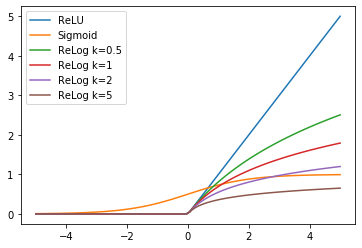

In [5]:
for label, vals in data.items():
    plt.plot(x, vals, label=label)
plt.legend(loc=2)
None

The advantages of this compare to $log_n(x + 1/n)+1$ is that it is a generalization of relu and its gradient well-behaves. It doesn't have a fixed point other than the origin but, empirically, that doesn't seem to matter.